## Look at the results - base model

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PROJECT_ROOT = Path.cwd()  # or set explicitly if needed
RES_DIR = PROJECT_ROOT

thr_path = RES_DIR / "thresholds_base.npz"
parquet_path = RES_DIR / "anomalies_steps_30.parquet"

# Load thresholds
thr = np.load(thr_path)
print("Threshold file keys:", thr.files)

mse_lat_thr = thr["mse_lat_thr"]
mse_lon_thr = thr["mse_lon_thr"]
mean_lat = thr["mean_lat"]
mean_lon = thr["mean_lon"]
std_lat = thr["std_lat"]
std_lon = thr["std_lon"]
K_SIGMA = float(thr["K_SIGMA"])
STEPS = int(thr["STEPS"])

print("K_SIGMA:", K_SIGMA, "STEPS:", STEPS)

# Load anomaly table
df = pd.read_parquet(parquet_path)
df.head()


Threshold file keys: ['mse_lat_thr', 'mse_lon_thr', 'mean_lat', 'mean_lon', 'std_lat', 'std_lon', 'K_SIGMA', 'STEPS']
K_SIGMA: 3.0 STEPS: 30


,batch_idx,sample_idx,step_ahead,mse_lat,mse_lon,anom_lat,anom_lon,anom_any
0,0,0,1,0.000160,0.000875,False,False,False
1,0,0,2,0.000188,0.000893,False,False,False
2,0,0,3,0.000210,0.001053,False,False,False
3,0,0,4,0.000235,0.001259,False,False,False
4,0,0,5,0.000257,0.001491,False,False,False


# Statistics for result

In [31]:
#For conversion to from mse to km 
KM_PER_DEG_LAT = 111.32

#Ref Latitude is based on the data being in Danish waters
REF_DEG_LAT = 56.0
KM_PER_DEG_LON = KM_PER_DEG_LAT * np.cos(np.deg2rad(REF_DEG_LAT))

print("Mean MSE for latitude: ", f"{df['mse_lat'].mean():.2e}")
print("Standard Deviation MSE for latitude: ", f"{df['mse_lat'].std():.2e}")
print("RMSE latitude in km: ", f"{(df['mse_lat'].mean()**0.5) * KM_PER_DEG_LAT:.2e}")
print("\n")
print("Mean MSE for longitude: ", f"{df['mse_lon'].mean():.2e}")
print("Standard Deviation MSE for longitude: ", f"{df['mse_lon'].std():.2e}")
print("RMSE longitude in km:   ", f"{(df['mse_lon'].mean()**0.5) * KM_PER_DEG_LON:.2e}")
print("\n\n")
#For time step 1
t1_lat = df[df['step_ahead'] == 1]['mse_lat']
print("Mean MSE for latitude at time step 1: ", f"{t1_lat.mean():.2e}")
print("Standard Deviation MSE for latitude at time step 1: ", f"{t1_lat.std():.2e}")
print("RMSE latitude in km: ", f"{(t1_lat.mean()**0.5) * KM_PER_DEG_LAT:.2e}")
print("\n")
t1_lon = df[df['step_ahead'] == 1]['mse_lon']
print("Mean MSE for longitude at time step 1: ", f"{t1_lon.mean():.2e}")
print("Standard Deviation MSE for longitude at time step 1: ", f"{t1_lon.std():.2e}")
print("RMSE longitude in km:   ", f"{(t1_lon.mean()**0.5) * KM_PER_DEG_LON:.2e}")
print("\n\n")

#For time step 30 
t30_lat = df[df['step_ahead'] == 30]['mse_lat']
print("Mean MSE for latitude at time step 30: ", f"{t30_lat.mean():.2e}")
print("Standard Deviation MSE for latitude at time step 30: ", f"{t30_lat.std():.2e}")
print("RMSE latitude in km: ", f"{(t30_lat.mean()**0.5) * KM_PER_DEG_LAT:.2e}")
print("\n")
t30_lon = df[df['step_ahead'] == 30]['mse_lon']
print("Mean MSE for longitude at time step 30: ", f"{t30_lon.mean():.2e}")
print("Standard Deviation MSE for longitude at time step 30: ", f"{t30_lon.std():.2e}")
print("RMSE longitude in km:   ", f"{(t30_lon.mean()**0.5) * KM_PER_DEG_LON:.2e}")
print("\n\n")

#Relative differences between time step 1 and 30
print("Relative difference in mean MSE for latitude between step 1 and 30: ", 
      round((t30_lat.mean() - t1_lat.mean()) / t1_lat.mean() * 100,1), "%")
print("Relative difference in mean MSE for longitude between step 1 and 30: ", 
      round((t30_lon.mean() - t1_lon.mean()) / t1_lon.mean() * 100, 1), "%")

Mean MSE for latitude:  8.42e-04
Standard Deviation MSE for latitude:  5.10e-03
RMSE latitude in km:  3.23e+00


Mean MSE for longitude:  2.33e-03
Standard Deviation MSE for longitude:  1.34e-01
RMSE longitude in km:    3.00e+00



Mean MSE for latitude at time step 1:  9.68e-05
Standard Deviation MSE for latitude at time step 1:  4.30e-04
RMSE latitude in km:  1.10e+00


Mean MSE for longitude at time step 1:  1.15e-04
Standard Deviation MSE for longitude at time step 1:  2.73e-04
RMSE longitude in km:    6.68e-01



Mean MSE for latitude at time step 30:  1.99e-03
Standard Deviation MSE for latitude at time step 30:  7.21e-03
RMSE latitude in km:  4.96e+00


Mean MSE for longitude at time step 30:  4.84e-03
Standard Deviation MSE for longitude at time step 30:  1.64e-01
RMSE longitude in km:    4.33e+00



Relative difference in mean MSE for latitude between step 1 and 30:  1950.7 %
Relative difference in mean MSE for longitude between step 1 and 30:  4109.7 %


Rows: 383970
Unique (batch, sample): 12799
Overall anomaly rate (any coord, any step): 0.014795426726046305


step_ahead
1     0.002344
2     0.012814
3     0.002813
4     0.014454
5     0.008126
6     0.003282
7     0.000703
8     0.001406
9     0.004610
10    0.007657
11    0.010470
12    0.009688
13    0.005469
14    0.018595
15    0.019923
16    0.007110
17    0.007110
18    0.006172
19    0.024533
20    0.024924
21    0.025783
22    0.026252
23    0.027033
24    0.027424
25    0.027658
26    0.028127
27    0.028127
28    0.026799
29    0.023517
30    0.010938
Name: anom_any, dtype: float64

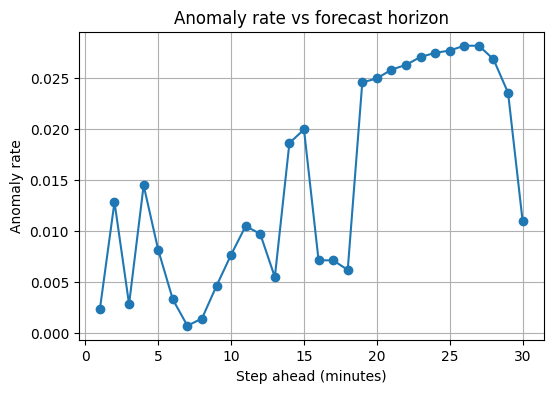

In [2]:
print("Rows:", len(df))
print("Unique (batch, sample):", df[["batch_idx", "sample_idx"]].drop_duplicates().shape[0])

print("Overall anomaly rate (any coord, any step):", df["anom_any"].mean())

# per-step anomaly rates
step_stats = df.groupby("step_ahead")["anom_any"].mean()
display(step_stats)

plt.figure(figsize=(6,4))
step_stats.plot(marker="o")
plt.xlabel("Step ahead (minutes)")
plt.ylabel("Anomaly rate")
plt.title("Anomaly rate vs forecast horizon")
plt.grid(True)
plt.show()


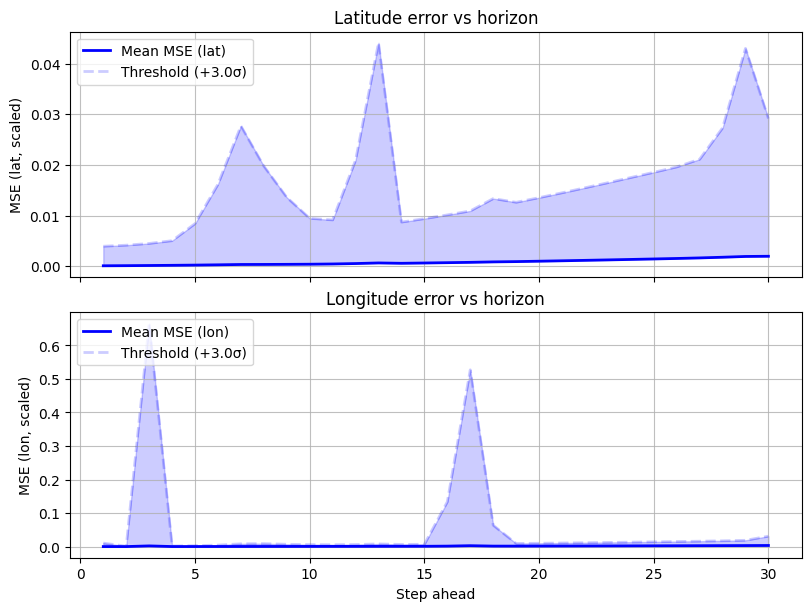

In [29]:

steps = np.arange(1, STEPS + 1)

lat_thr = mean_lat + K_SIGMA * std_lat
lon_thr = mean_lon + K_SIGMA * std_lon

fig, axes = plt.subplots(
    nrows=2, ncols=1, sharex=True, figsize=(8, 6), constrained_layout=True
)

# --- Latitude ---
ax = axes[0]
ax.plot(steps, mean_lat, linewidth=2, label="Mean MSE (lat)", color="blue")
ax.plot(steps, lat_thr, linestyle="--", linewidth=2, label=f"Threshold (+{K_SIGMA}σ)", color = "blue", alpha=0.2)
ax.fill_between(steps, mean_lat, lat_thr, alpha=0.2, color="blue")

ax.set_ylabel("MSE (lat, scaled)")
ax.set_title("Latitude error vs horizon")
ax.grid(True, alpha=0.8)
ax.legend(loc="upper left")

# --- Longitude ---
ax = axes[1]
ax.plot(steps, mean_lon, linewidth=2, label="Mean MSE (lon)", color="blue")
ax.plot(steps, lon_thr, linestyle="--", linewidth=2, label=f"Threshold (+{K_SIGMA}σ)", color = "blue", alpha=0.2)
ax.fill_between(steps, mean_lon, lon_thr, alpha=0.2, color="blue")

ax.set_xlabel("Step ahead")
ax.set_ylabel("MSE (lon, scaled)")
ax.set_title("Longitude error vs horizon")
ax.grid(True, alpha = 0.8)
ax.legend(loc="upper left")

plt.show()


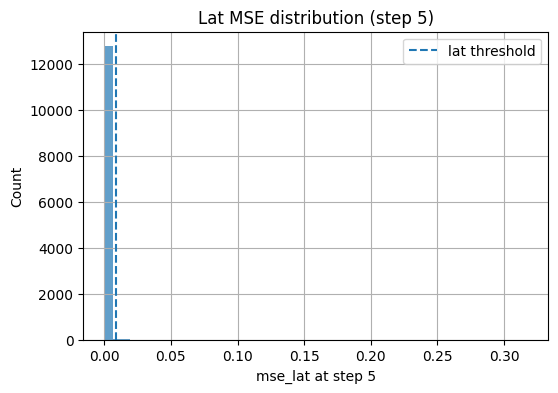

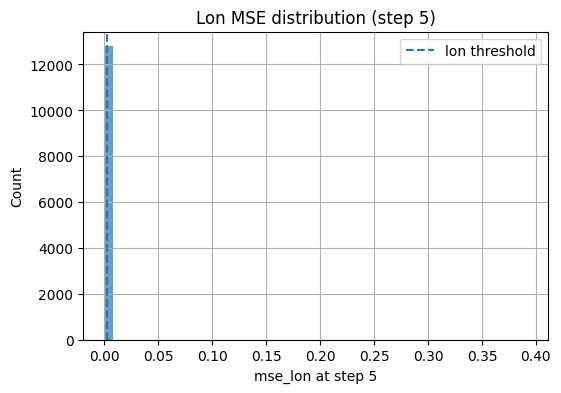

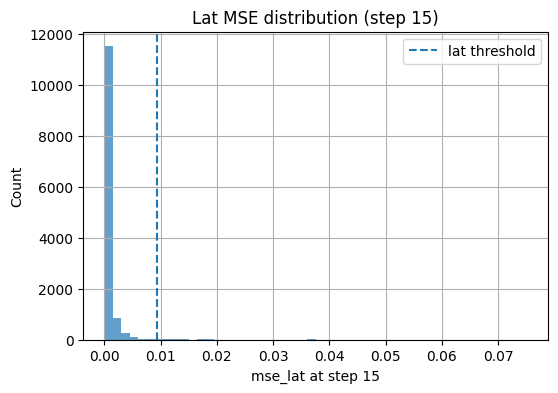

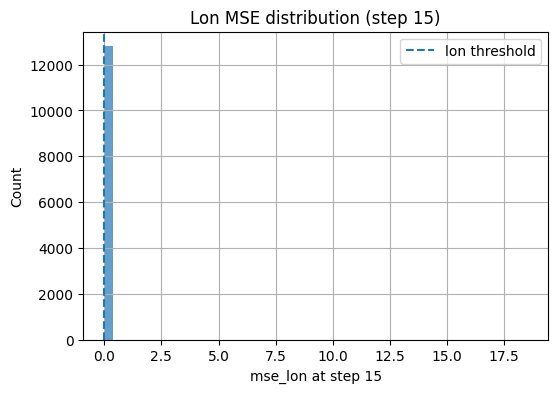

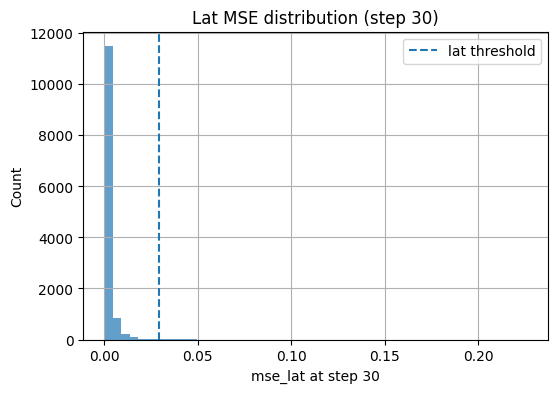

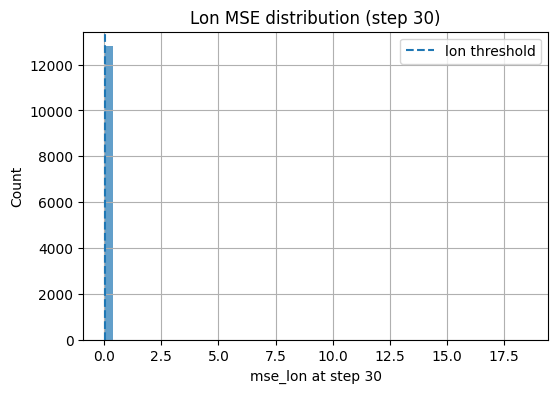

In [4]:
timesteps_to_check = [5, 15, 30]

for t in timesteps_to_check:
    subset = df[df["step_ahead"] == t]

    plt.figure(figsize=(6,4))
    subset["mse_lat"].hist(bins=50, alpha=0.7)
    plt.axvline(mse_lat_thr[t-1], linestyle="--", label="lat threshold")
    plt.xlabel(f"mse_lat at step {t}")
    plt.ylabel("Count")
    plt.title(f"Lat MSE distribution (step {t})")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,4))
    subset["mse_lon"].hist(bins=50, alpha=0.7)
    plt.axvline(mse_lon_thr[t-1], linestyle="--", label="lon threshold")
    plt.xlabel(f"mse_lon at step {t}")
    plt.ylabel("Count")
    plt.title(f"Lon MSE distribution (step {t})")
    plt.legend()
    plt.show()
